In [98]:
import xarray as xr
import numpy as np
import sys
import os
import matplotlib.pyplot as plt
import pandas as pd

from functions import masked_average

In [2]:
import cartopy.crs as ccrs
import cartopy as cy
def sp_map(*nrs, projection = ccrs.PlateCarree(), **kwargs):
    return plt.subplots(*nrs, subplot_kw={'projection':projection}, **kwargs)

def add_map_features(ax):
    ax.coastlines()
    gl = ax.gridlines()
    ax.add_feature(cy.feature.BORDERS);
    gl = ax.gridlines()#draw_labels=True)
    gl.xlabels_top = False
    gl.ylabels_right = False


In [3]:
import matplotlib.path as mpath

def polarCentral_set_latlim(lat_lims, ax):
    ax.set_extent([-180, 180, lat_lims[0], lat_lims[1]], ccrs.PlateCarree())
    # Compute a circle in axes coordinates, which we can use as a boundary
    # for the map. We can pan/zoom as much as we like - the boundary will be
    # permanently circular.
    theta = np.linspace(0, 2*np.pi, 100)
    center, radius = [0.5, 0.5], 0.5
    verts = np.vstack([np.sin(theta), np.cos(theta)]).T
    circle = mpath.Path(verts * radius + center)

    ax.set_boundary(circle, transform=ax.transAxes)


In [5]:
os.getcwd()

'/home/jonahks/git_repos/netcdf_analysis'

In [12]:
os.chdir('/home/jonahks/drivemount/')
files = os.listdir()

In [13]:
ds = xr.open_dataset(files[0])
gw = ds['gw']

Create new variable by dividing out the cloud fraction near each isotherm

In [19]:
ds['SLF_ISOTM'] = ds['SLFXCLD_ISOTM'] / ds['CLD_ISOTM']

In [21]:
ds['SLF_ISOTM'].shape

(1, 9, 96, 144)

In [30]:
slf_isotm = ds['SLF_ISOTM'].isel(time=0)

Plot the global SLF at each isotherm

Text(0.5, 0.98, 'SLF distribution across isotherms')

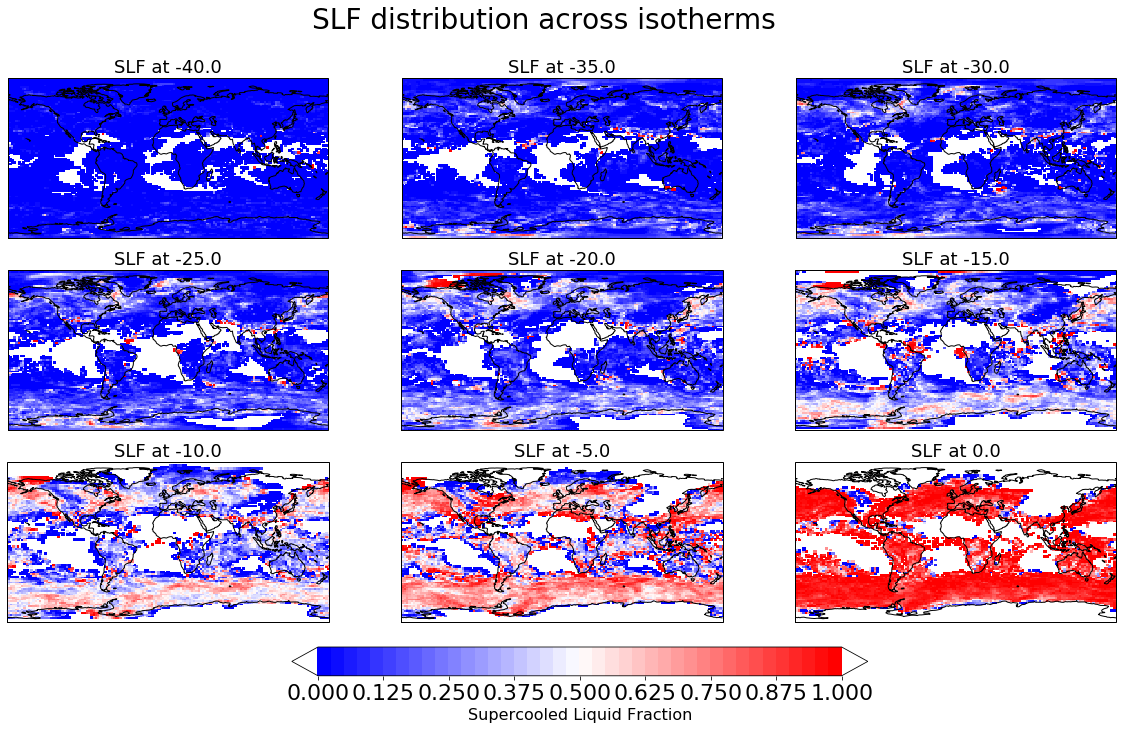

In [97]:
fig1, axes1 = plt.subplots(nrows=3,ncols=3, subplot_kw={'projection': ccrs.PlateCarree()}, figsize=[20,10]);

cmin_p = np.nanmin(slf_isotm)
cmax_p = np.nanmax(slf_isotm)

cmap_p = 'bwr'
nlevels = 41
cmap2 = plt.get_cmap(cmap_p)

if cmin_p == cmax_p:
   cmax_p = cmax_p + 0.00001

levels = np.linspace(cmin_p,cmax_p,nlevels)

for data, ax in zip(slf_isotm, axes1.flatten()):
    iso = data['isotherms_mpc'].values - 273.15
    map = data.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='bwr', robust=True, add_colorbar = False, levels=levels)

    ax.set_title('SLF at %s' % str(iso), fontsize=18)
    ax.coastlines()
cb_ax = fig1.add_axes([0.325, 0.05, 0.4, 0.04])

cbar = plt.colorbar(map, cax=cb_ax, extend='both', orientation='horizontal', fraction=0.046, pad=0.04)
cbar.ax.tick_params(labelsize=22)
cbar.ax.set_xlabel('Supercooled Liquid Fraction', fontsize=16)

fig1.suptitle('SLF distribution across isotherms', fontsize=28)

In [107]:
gw

<xarray.DataArray 'gw' (lat: 96)>
array([0.000137, 0.001093, 0.002185, 0.003275, 0.004361, 0.005443, 0.006518,
       0.007587, 0.008647, 0.009697, 0.010737, 0.011765, 0.012781, 0.013782,
       0.014768, 0.015739, 0.016692, 0.017626, 0.018542, 0.019437, 0.020311,
       0.021162, 0.021991, 0.022795, 0.023575, 0.024329, 0.025056, 0.025756,
       0.026427, 0.02707 , 0.027683, 0.028266, 0.028818, 0.029339, 0.029827,
       0.030283, 0.030705, 0.031094, 0.031449, 0.03177 , 0.032056, 0.032307,
       0.032522, 0.032702, 0.032847, 0.032955, 0.033027, 0.033063, 0.033063,
       0.033027, 0.032955, 0.032847, 0.032702, 0.032522, 0.032307, 0.032056,
       0.03177 , 0.031449, 0.031094, 0.030705, 0.030283, 0.029827, 0.029339,
       0.028818, 0.028266, 0.027683, 0.02707 , 0.026427, 0.025756, 0.025056,
       0.024329, 0.023575, 0.022795, 0.021991, 0.021162, 0.020311, 0.019437,
       0.018542, 0.017626, 0.016692, 0.015739, 0.014768, 0.013782, 0.012781,
       0.011765, 0.010737, 0.009697, 0.008

In [123]:
_wgs = ds['TS'].copy()
_wgs = (_wgs * 0 + 1) * gw # copy gw into the 2d array
_wgs = _wgs / np.sum(_wgs)  # Normalize
_wgs.name = 'cell_weight'

ds['cell_weight'] = _wgs

In [125]:
np.nansum(np.multiply(ds['TS'], ds['cell_weight']))

286.04058328891824

In [190]:
glob_mean = masked_average(ds['TS'], dim=['lat','lon'], weights=ds['cell_weight'])
glob_mean

<xarray.DataArray (time: 1)>
array([286.04058329])
Coordinates:
  * time     (time) object 0001-02-01 00:00:00

In [188]:
mask = np.bitwise_or(ds['lat']<70, ds['lat']>90)
mask

<xarray.DataArray 'lat' (lat: 96)>
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False, False, False, False,
       False, False, False, False, False, False])
Coordinates:
  * lat      (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 84.32 86.21 88.11 90.0

In [189]:
glob_mean = masked_average(ds['TS'], dim=['lat','lon'], weights=ds['cell_weight'], mask=mask)
glob_mean

<xarray.DataArray (time: 1)>
array([242.26836806])
Coordinates:
  * time     (time) object 0001-02-01 00:00:00

In [40]:
t = [0.1,0.5]; s = [[1,2],[3,4],[5,6]];
np.multiply(s, t)

array([[0.1, 1. ],
       [0.3, 2. ],
       [0.5, 3. ]])

In [33]:
cld_prox = ds['CLOUD'].isel(time=0, lev=15)

In [35]:
print(gw.shape, cld_prox.shape)
np.multiply(cld_prox, gw)

(96,) (96, 144)


<xarray.DataArray (lat: 96, lon: 144)>
array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.90959251e-09, 1.97852894e-09, 1.44073494e-09, ...,
        2.98357571e-09, 2.09623482e-09, 1.81677796e-09],
       ...,
       [1.17454014e-04, 1.20864543e-04, 1.23258007e-04, ...,
        1.03748256e-04, 1.08351560e-04, 1.12481361e-04],
       [4.63128310e-05, 4.64023717e-05, 4.63627007e-05, ...,
        3.50654959e-05, 4.11605636e-05, 4.62547298e-05],
       [2.75256688e-06, 2.75256688e-06, 2.75256688e-06, ...,
        2.75256688e-06, 2.75256688e-06, 2.75256688e-06]])
Coordinates:
  * lat      (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 84.32 86.21 88.11 90.0
  * lon      (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
    lev      float64 232.8
    time     object 0001-02-01 00:00:00